# From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible

# Data Loading

In [27]:
import pandas as pd

df = pd.read_csv('mushroom.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gil-size,gil-color,stalk-shape,...,stalk-color-above-ring,stalk-color-belo-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## Columns Description
* Class label= poisonous : edible=e, poisonous=p
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, ur.
ban=u,waste=w,woods=d

# Data Exploration

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gil-size                  8124 non-null   object
 8   gil-color                 8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-belo-ring   

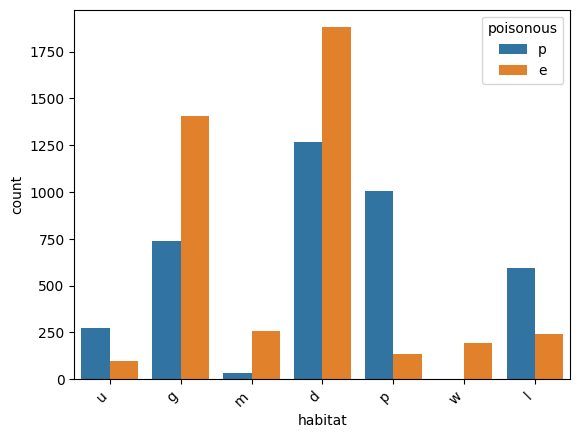

In [29]:
# Contoh grafik label poisonous terhadap habitat
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='habitat',hue=df['poisonous'])
plt.xticks(rotation=45, ha='right');

# DATA PROCESING

## Split Data

In [30]:
X=df.iloc[:,:22].values
y=df.iloc[:, 22].values

In [6]:
print(X)

[['x' 's' 'n' ... 'k' 's' 'u']
 ['x' 's' 'y' ... 'n' 'n' 'g']
 ['b' 's' 'w' ... 'n' 'n' 'm']
 ...
 ['f' 's' 'n' ... 'b' 'c' 'l']
 ['k' 'y' 'n' ... 'w' 'v' 'l']
 ['x' 's' 'n' ... 'o' 'c' 'l']]


In [7]:
print(y)

['p' 'e' 'e' ... 'e' 'p' 'e']


## Transform typedata Kategorical to Numerik

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through columns 0 to 21
for col in range(0, 22):
    X[:, col] = le.fit_transform(X[:, col])

y = le.fit_transform(y)

In [71]:
print(df)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            5           2         4       1    6               1   
1            5           2         9       1    0               1   
2            0           2         8       1    3               1   
3            5           3         8       1    6               1   
4            5           2         3       0    5               1   
...        ...         ...       ...     ...  ...             ...   
8119         3           2         4       0    5               0   
8120         5           2         4       0    5               0   
8121         2           2         4       0    5               0   
8122         3           3         4       0    8               1   
8123         5           2         4       0    5               0   

     gill-spacing gil-size gil-color stalk-shape  ... stalk-color-above-ring  \
0               0        1         4           0  ...                      7   
1          

## Checking if the Data has a NaN Value

In [9]:
print(df.isnull().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gil-size                    0
gil-color                   0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-belo-ring       0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64


## Checkinf if the Data is Imbalanced

In [10]:
import numpy as np

# Assuming 'y' is a NumPy array
unique_values, counts = np.unique(y, return_counts=True)

# 'unique_values' will contain the unique values in 'y', and 'counts' will contain their corresponding counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 4208
Value: 1, Count: 3916


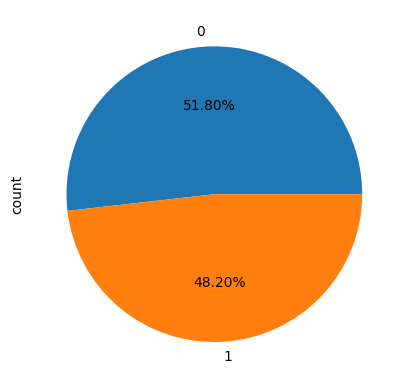

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y' is a NumPy array
y_series = pd.Series(y)

# Use value_counts and plot the pie chart
y_series.value_counts().plot.pie(autopct='%.2f%%')

plt.show()


## Labeling the Data and Characteristics

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.83427256, -1.50847428,  1.75382193, ..., -1.08419784,
         1.07753997, -0.87289376],
       [ 1.0418928 ,  0.12824963,  1.36342226, ..., -0.66405767,
        -1.29729472,  0.87793319],
       [ 1.0418928 ,  0.94661159, -0.97897577, ..., -0.2439175 ,
         1.07753997, -0.87289376],
       ...,
       [ 1.0418928 ,  0.94661159, -0.19817643, ...,  1.43664319,
         0.28592841,  0.29432421],
       [ 1.0418928 , -1.50847428, -0.97897577, ..., -0.2439175 ,
         0.28592841, -0.87289376],
       [-0.83427256, -1.50847428, -0.5885761 , ..., -0.2439175 ,
         1.07753997, -0.87289376]])

In [15]:
X_test

array([[ 1.0418928 , -1.50847428,  1.36342226, ..., -0.2439175 ,
        -2.88051785, -0.28928478],
       [-0.83427256,  0.12824963,  1.36342226, ..., -1.08419784,
        -0.50568315, -0.28928478],
       [ 1.0418928 , -1.50847428, -1.36937544, ...,  1.43664319,
         0.28592841,  0.29432421],
       ...,
       [-0.83427256,  0.94661159, -0.19817643, ...,  1.43664319,
         0.28592841,  1.46154217],
       [-2.08504947, -1.50847428,  1.36342226, ...,  1.43664319,
        -0.50568315, -0.28928478],
       [ 1.0418928 ,  0.12824963,  1.36342226, ...,  1.43664319,
        -1.29729472, -0.28928478]])

# Naive Bayes

## Model Building and Training

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

## Model Evaluation

In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9198060425214473
F1 Score: 0.9197574782178044


# Confusion Matrix

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [19]:
cm_nb = confusion_matrix(y_test,y_pred)

In [20]:
cm_nb

array([[1286,  128],
       [  87, 1180]], dtype=int64)

In [21]:
tn, fp, fn, tp = cm_nb.ravel()
    
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp + fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [22]:
print("recall: ", recall)
print("precision: ", precision)
print("accuracy: ", accuracy)
print("f1-score: ", f1)

recall:  0.9313338595106551
precision:  0.9021406727828746
accuracy:  0.9198060425214473
f1-score:  0.9165048543689321


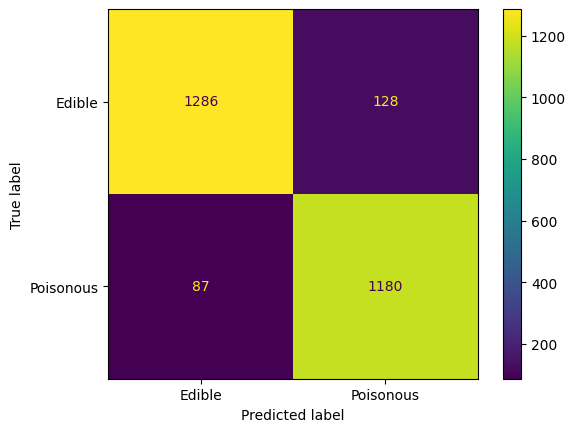

In [23]:
labels = ["Edible", "Poisonous"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();